In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


<AxesSubplot:xlabel='cgpa'>

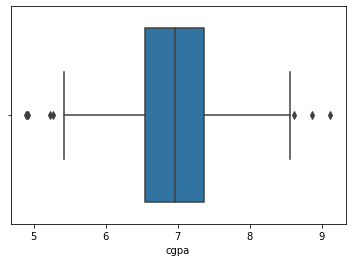

In [7]:
sns.boxplot(df['cgpa'])

<AxesSubplot:xlabel='cgpa', ylabel='Density'>

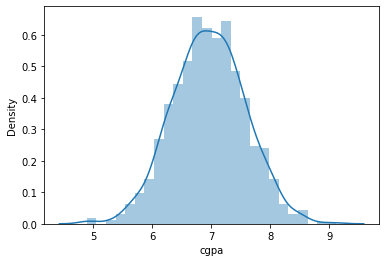

In [8]:
sns.distplot(df['cgpa'])

In [9]:
df['placement_exam_marks'].skew()
df['cgpa'].skew()

-0.014529938929314918

In [10]:
#Detecting Outliers using the extreme bounds
upper_bound=df['cgpa'].mean()+3*df['cgpa'].std()
lower_bound=df['cgpa'].mean()-3*df['cgpa'].std()

In [11]:
upper_bound,lower_bound

(8.808933625397177, 5.113546374602842)

In [12]:
df[(df['cgpa']> 8.8) | (df['cgpa']<5.113)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [13]:
df_new=df[(df['cgpa']< 8.8) & (df['cgpa']>5.113)]

In [14]:
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


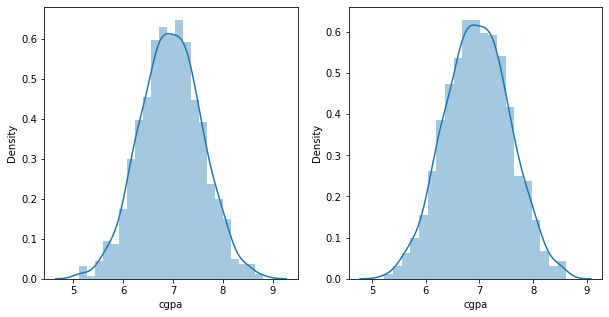

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df_new['cgpa'])

plt.show()

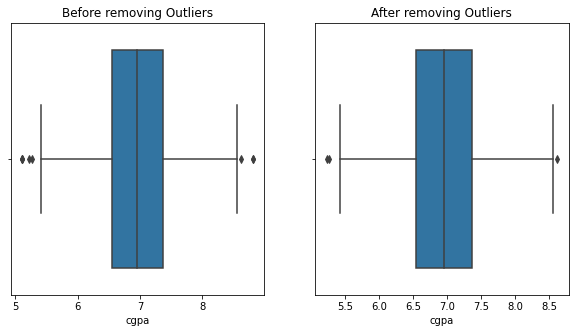

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['cgpa'])
plt.title('Before removing Outliers')
plt.subplot(122)
sns.boxplot(df_new['cgpa'])
plt.title('After removing Outliers')
plt.show()

In [15]:
df['cgpa_z_score']= (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [16]:
df[(df['cgpa_z_score']>3) |(df['cgpa_z_score']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
new_df2=df[(df['cgpa_z_score']<3) &(df['cgpa_z_score']>-3)]
new_df2.drop(['cgpa_z_score'],axis=1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [19]:
df['cgpa'] = np.where(
    df['cgpa']>upper_bound,
    upper_bound,
    np.where(
        df['cgpa']<lower_bound,
        lower_bound,
        df['cgpa']
    )
)

In [20]:
df.shape

(1000, 4)